# CPI prediction project - STATS 131
Group memebers: Kaixin Wang, Qin Hu, Ruby Zhang, and Emily Suan

## 1. Objective:
Predict CPI (customer price index) of countries using predictors relevant to economic growth. 

## 2. Introduction:
### Datasets:
* GDP_and_GDP_Per_Capita.csv (1)
* Expenditure_on_Health.csv (2)
* Production_Trade_and_Supply_of_Energy.csv (3)
* Internet_Usage.csv (4)
* Public_Expenditure_on_Education.csv (5)
* Tourist_Visitors_Arrival_and_Expenditure.csv (6)
* GDP_on_R&D.csv (7)
* Exchange_Rates.csv (8)
* Consumer_Price_Index.csv (9)

### Variables from datasets:
* response: CPI (9)
* predictors:
    - GDP (1)
    - expenditure on health (2)
    - energy usage (3)
    - Internet usage (4)
    - expenditure on education (5)
    - expenditure on tourism (6)
    - expenditure on science & technology (7)
    - exchange rate (8)
    
### Datasets sources:
United Nations: http://data.un.org/
- National accounts (1)
    - GDP and GDP per capita
- Nutrition and health (2)
    - Health expenditure
- Energy (3)
    - Energy production, trade and consumption
- Communication (4)
    - Internet usage
- Education (5)
    - Public expenditure on education
- Science and technology (7)
    - Human resources in R & D
- Finance (8)
    - Exchange rates
- Price and production indices (9)
    - Consumer price indices
   

## 3.  Data Clean-up:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# handling warning messages:
import warnings
warnings.filterwarnings('ignore')

In [3]:
CPI = pd.read_csv("Consumer_Price_Index.csv", encoding ="ISO-8859-1")
CPI.Series.unique()      # to extra certain rows
CPI = CPI.loc[CPI.Series == 'Consumer price index: General']
countries = CPI.Country.unique()
CPI.head()

,ID,Country,Year,Series,Value
0,4,Afghanistan,2005,Consumer price index: General,71.1
1,4,Afghanistan,2010,Consumer price index: General,100.0
2,4,Afghanistan,2014,Consumer price index: General,133.1
3,4,Afghanistan,2015,Consumer price index: General,132.1
4,4,Afghanistan,2016,Consumer price index: General,137.9


In [4]:
health = pd.read_csv("Expenditure_on_Health.csv", encoding ="ISO-8859-1")
health = health.loc[health.Series == 'Current health expenditure (% of GDP)']
health.head()

,ID,Country,Year,Series,Value
0,4,Afghanistan,2005,Current health expenditure (% of GDP),9.9
1,4,Afghanistan,2010,Current health expenditure (% of GDP),8.6
2,4,Afghanistan,2013,Current health expenditure (% of GDP),8.8
3,4,Afghanistan,2014,Current health expenditure (% of GDP),9.7
4,4,Afghanistan,2015,Current health expenditure (% of GDP),10.3


In [5]:
GDP = pd.read_csv("GDP_and_GDP_Per_Capita.csv", encoding ="ISO-8859-1")
gdp = GDP.loc[GDP.Series == "GDP per capita (US dollars)"]

In [6]:
energy = pd.read_csv("Production_Trade_and_Supply_of_Energy.csv", encoding ="ISO-8859-1" )
energy = energy.loc[energy.Series == "Primary energy production (petajoules)"]

In [7]:
internet = pd.read_csv("Internet_Usage.csv", encoding ="ISO-8859-1" )

In [8]:
education = pd.read_csv("Public_Expenditure_on_Education.csv", encoding ="ISO-8859-1" )
education.loc[education.Series == 'Current expenditure other than staff compensation as % of total expenditure in public institutions (%)']
education = education.loc[education.Series == "Public expenditure on education (% of government expenditure)"]

In [9]:
tourism = pd.read_csv("Tourist_Visitors_Arrival_and_Expenditure.csv", encoding ="ISO-8859-1" )
tourism = tourism.loc[tourism.Series == "Tourism expenditure (millions of US dollars)"]

In [10]:
technology = pd.read_csv("GDP_on_R&D.csv", encoding ="ISO-8859-1" )
tech = technology.loc[technology.Series == 'Gross domestic expenditure on R & D: as a percentage of GDP (%)']

In [11]:
rates = pd.read_csv("Exchange_Rates.csv", encoding ="ISO-8859-1" )
rates = rates.loc[rates.Series == "Exchange rates: period average (national currency per US dollar)"]

In [12]:
gdp.pivot(index = "Year", columns = "Country", values = "Value").head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Boliv. Rep. of),Viet Nam,Yemen,Zambia,Zanzibar,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1985,282.0,783.0,2564.0,9837.0,859.0,4072.0,3508.0,3144.0,NaN,6108.0,...,18017.0,1735.0,NaN,1020.0,3425.0,79.0,NaN,399.0,NaN,872.0
1995,189.0,770.0,1452.0,23359.0,466.0,10583.0,7841.0,7993.0,426.0,16442.0,...,28758.0,6609.0,589.0,1621.0,3375.0,276.0,387.0,417.0,235.0,846.0
2005,264.0,2615.0,3100.0,41281.0,1891.0,18129.0,11453.0,5125.0,1753.0,23303.0,...,44173.0,5221.0,543.0,1886.0,5433.0,684.0,925.0,691.0,408.0,481.0
2010,558.0,4056.0,4463.0,39734.0,3586.0,19459.0,12175.0,10346.0,3432.0,23513.0,...,48574.0,11938.0,1382.0,2966.0,13566.0,1310.0,1309.0,1463.0,587.0,720.0
2015,611.0,3895.0,4163.0,36040.0,4171.0,22622.0,13602.0,14853.0,3618.0,25796.0,...,56948.0,15525.0,2160.0,2871.0,11054.0,2065.0,990.0,1319.0,795.0,1033.0


In [13]:
CPI = CPI.pivot(index = "Year", columns = "Country", values = "Value")
GDP = gdp.pivot(index = "Year", columns = "Country", values = "Value")
energy = energy.pivot(index = "Year", columns = "Country", values = "Value")
health = health.pivot(index = "Year", columns = "Country", values = "Value")
education = education.pivot(index = "Year", columns = "Country", values = "Value")
tech = tech.pivot(index = "Year", columns = "Country", values = "Value")
internet = internet.pivot(index = "Year", columns = "Country", values = "Value")
rates = rates.pivot(index = "Year", columns = "Country", values = "Value")
tourism = tourism.pivot(index = "Year", columns = "Country", values = "Value")

In [14]:
name = 'United States of America'
table1 = pd.DataFrame(CPI.loc[:, name])
table1 = pd.concat([table1, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]), pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Internet", "Tourism", "Health"])
table1 = table1.swaplevel().unstack()
table1.fillna(method = "ffill", inplace = True)
table1.fillna(method = "bfill", inplace = True)

In [15]:
table1.head()

United States of America                                             
                       Energy     Tech Education Internet Tourism   Health
Year                                                                      
1985                     69.9  18017.0   68588.0      2.5    43.1  93743.0
1990                     69.9  18017.0   68588.0      2.5    43.1  93743.0
1995                     69.9  28758.0   68963.0      2.5    43.1  93743.0
2000                     69.9  28758.0   69339.0      2.5    43.1  93743.0
2001                     69.9  28758.0   69339.0      2.5    43.1  93743.0

In [16]:
name = 'China'
table2 = pd.DataFrame(CPI.loc[:, name])
table2 = pd.concat([table2, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]), pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Rates", "Internet", "Tourism", "Health"])
table2 = table2.swaplevel().unstack()
table2.fillna(method = "ffill", inplace = True)
table2.fillna(method = "bfill", inplace = True)

In [17]:
table2.head()

China                                        
     Energy   Tech    Rates Internet Tourism Health
Year                                               
1985  100.0  289.0  32727.0      1.3     2.9    1.8
1990  100.0  289.0  32727.0      1.3     2.9    1.8
1995  100.0  592.0  39692.0      1.3     8.4    1.8
2000  100.0  592.0  40783.0      1.3     8.4    1.8
2001  100.0  592.0  40783.0      1.3     8.4    1.8

## 4. Exploratory Data Analysis:

In [18]:
# processing data:
rates["United States of America"] = 1.0   # rates for US is always 1
education["China"] = 0                    # no entries for education of China
CPI["China"].loc[CPI["China"].index == 2016] = CPI["China"].loc[CPI["China"].index == 2015].iloc[0] * CPI["China"].loc[CPI["China"].index == 2016].iloc[0] / 100
CPI["China"].loc[CPI["China"].index == 2017] = CPI["China"].loc[CPI["China"].index == 2015].iloc[0]  * CPI["China"].loc[CPI["China"].index == 2017].iloc[0] / 100
years = CPI.index
# since CPI = 100 for year 2010 (base year)
years = [1995, 2005, 2014, 2015, 2016, 2017]

In [19]:
# G7 countires: United States of America, Germany, France, Japan, Canada, United Kingdon and Italy
# BRICS countires: Brazil, Russian Federation, India, China and South Africa
G7 = ["United States of America", "Germany", "France", "Japan", "Canada", "United Kingdom", "Italy"]
BRICS = ["Brazil", "Russian Federation", "India", "China", "South Africa"]
df1 = pd.DataFrame()
for name in G7: 
    table = pd.DataFrame(CPI.loc[years, name])
    table = pd.concat([table, pd.DataFrame(GDP.loc[years, name]), pd.DataFrame(energy.loc[years, name]), pd.DataFrame(tech.loc[years, name]), pd.DataFrame(education.loc[years, name]), pd.DataFrame(rates.loc[years, name]), pd.DataFrame(internet.loc[years, name]), pd.DataFrame(tourism.loc[years, name]), pd.DataFrame(health.loc[years, name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
    table = table.swaplevel().unstack()
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df1 = pd.concat([df1, table], axis = 1)
    
df2 = pd.DataFrame()
for name in BRICS: 
    table = pd.DataFrame(CPI.loc[years, name])
    table = pd.concat([table, pd.DataFrame(GDP.loc[years, name]), pd.DataFrame(energy.loc[years, name]), pd.DataFrame(tech.loc[years, name]), pd.DataFrame(education.loc[years, name]), pd.DataFrame(rates.loc[years, name]), pd.DataFrame(internet.loc[years, name]), pd.DataFrame(tourism.loc[years, name]), pd.DataFrame(health.loc[years, name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
    table = table.swaplevel().unstack()
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df2 = pd.concat([df2, table], axis = 1)
    
df1.fillna(0, inplace = True)
df2.fillna(0, inplace = True)

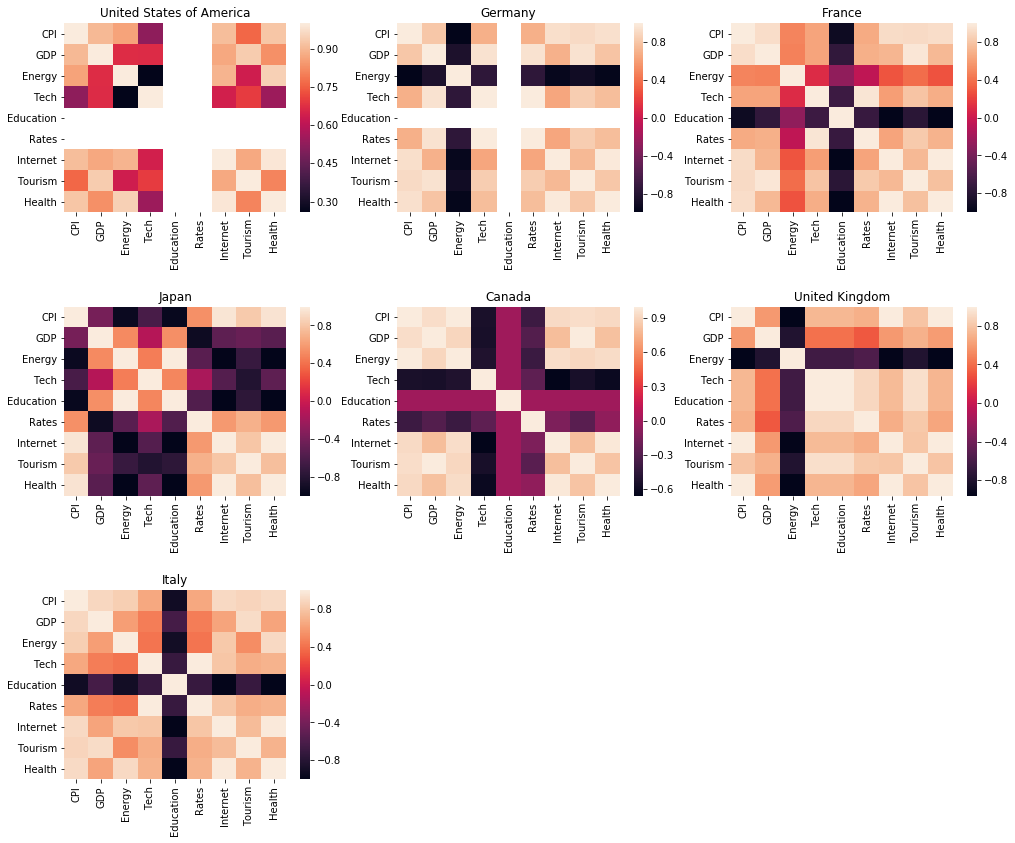

In [20]:
# G7 countries:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(bottom = 0.5, right = 1, top = 1.2, hspace = 0.5)
for i in range(1, 8):
    plt.subplot(3, 3, i)
    corr = df1[G7[i - 1]].corr()
    sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
    plt.title(G7[i - 1])
plt.show()

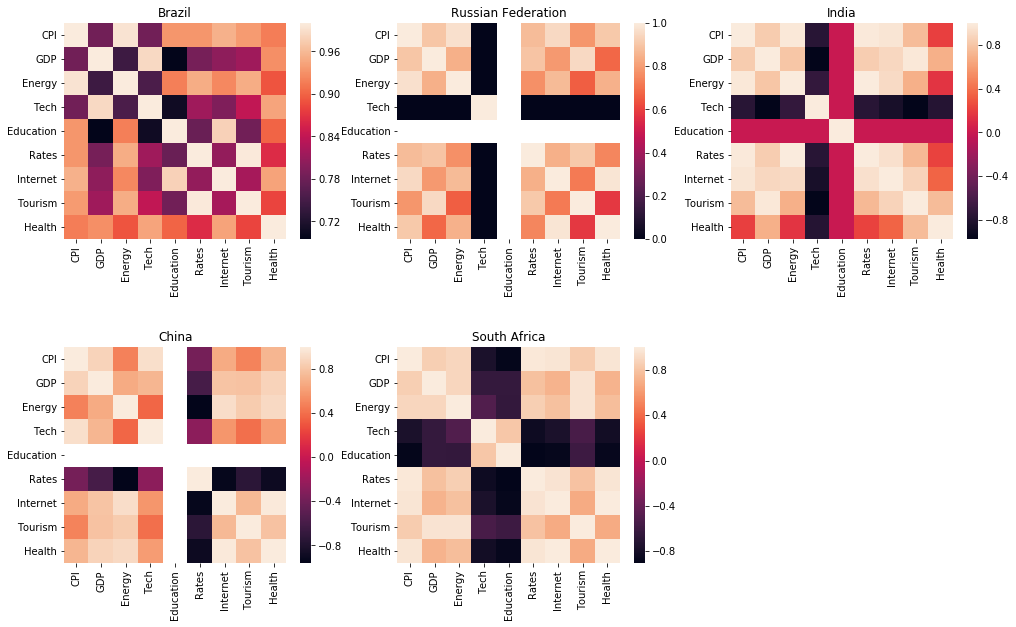

In [21]:
# BRICS countries:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(bottom = 0.5, right = 1, top = 1, hspace = 0.5)
for i in range(1, 6):
    plt.subplot(2,3,i)
    corr = df2[BRICS[i-1]].corr()
    sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
    plt.title(BRICS[i-1])
plt.show()

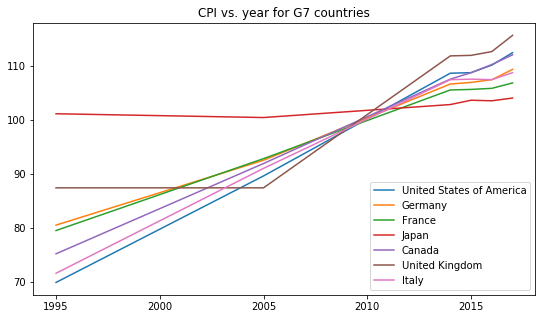

In [22]:
plt.figure(figsize = (9, 5))
for i in range(7):
    plt.plot(df1.index, df1[G7[i]].CPI, label = G7[i])
    plt.legend()
    plt.title("CPI vs. year for G7 countries")
plt.show()

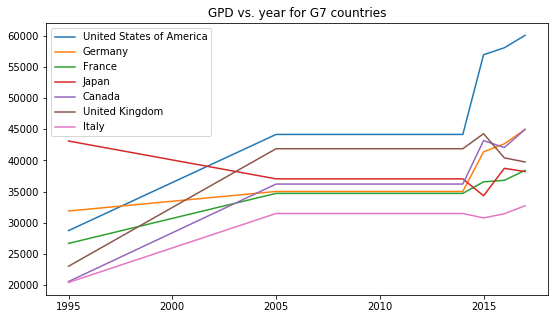

In [23]:
plt.figure(figsize = (9, 5))
for i in range(7):
    plt.plot(df1.index, df1[G7[i]].GDP, label = G7[i])
    plt.legend()
    plt.title("GPD vs. year for G7 countries")
plt.show()

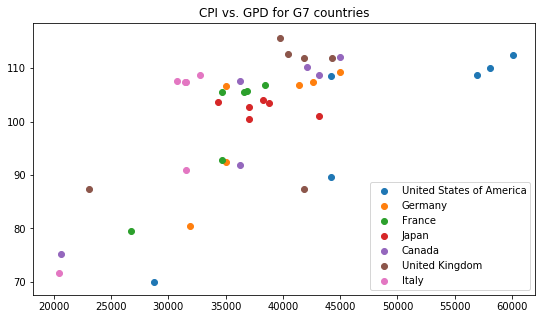

In [24]:
plt.figure(figsize = (9, 5))
colors = ["b","g","m","r","c","y","p"]
for i in range(7):
    plt.scatter(df1[G7[i]].GDP, df1[G7[i]].CPI, label = G7[i])
    plt.legend()
    plt.title("CPI vs. GPD for G7 countries")
plt.show()

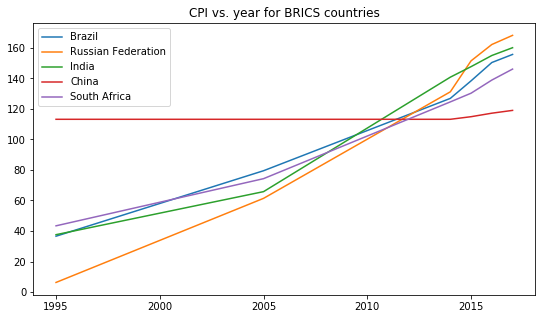

In [25]:
plt.figure(figsize = (9, 5))
for i in range(5):
    plt.plot(df2.index, df2[BRICS[i]].CPI, label = BRICS[i])
    plt.legend()
    plt.title("CPI vs. year for BRICS countries")
plt.show()

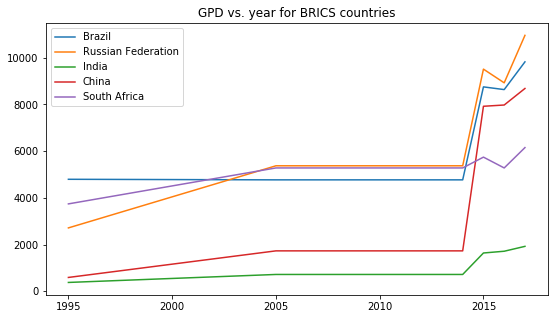

In [26]:
plt.figure(figsize = (9, 5))
for i in range(5):
    plt.plot(df2.index, df2[BRICS[i]].GDP, label = BRICS[i])
    plt.legend()
    plt.title("GPD vs. year for BRICS countries")
plt.show()

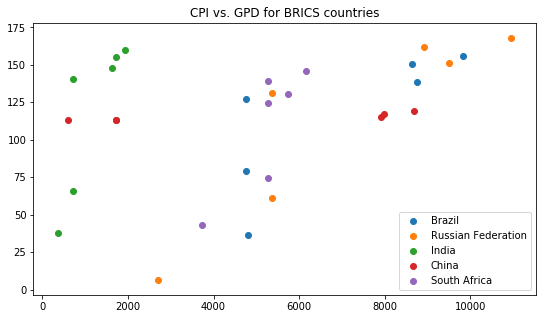

In [27]:
plt.figure(figsize = (9, 5))
colors = ["b","g","m","r","c","y","p"]
for i in range(5):
    plt.scatter(df2[BRICS[i]].GDP, df2[BRICS[i]].CPI, label = BRICS[i])
    plt.legend()
    plt.title("CPI vs. GPD for BRICS countries")
plt.show()

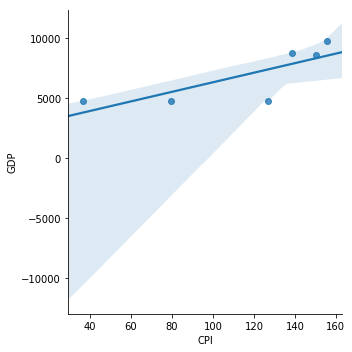

In [28]:
sns.lmplot("CPI", "GDP", data = df2[BRICS[0]])
plt.show()

<Figure size 648x360 with 0 Axes>

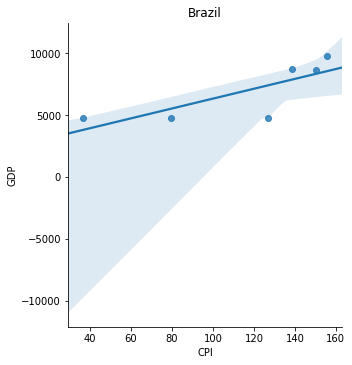

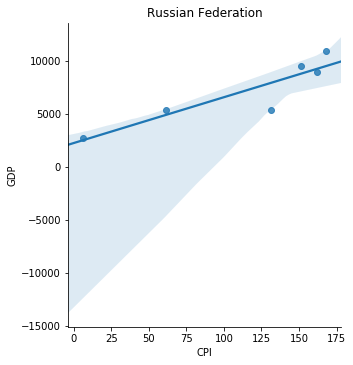

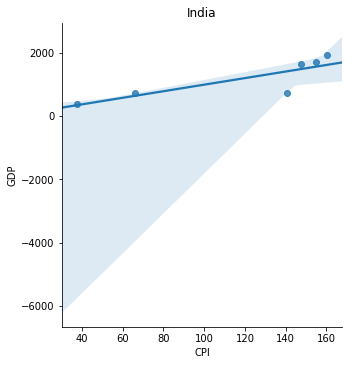

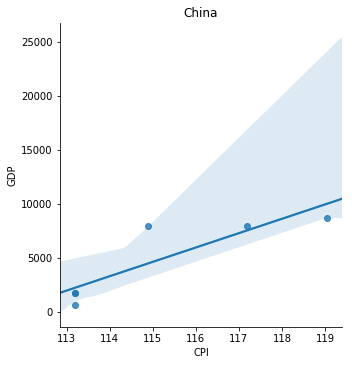

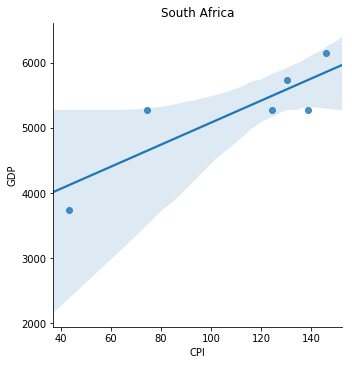

In [29]:
plt.figure(figsize = (9, 5))
colors = ["b","g","m","r","c","y","p"]
for i in range(5):
    # plt.subplot(2,3,i+1)
    sns.lmplot("CPI", "GDP", data = df2[BRICS[i]])
    plt.title(BRICS[i])
plt.show()

In [30]:
df1 = pd.concat([CPI.stack().loc[list(years), "Italy"], GDP.stack().loc[list(years), "Italy"], health.stack().loc[list(years), "Italy"]], axis = 1, keys = ["CPI", "GDP", "health"])

In [31]:
# Final dataframe for modeling:
G7 = ["United States of America", "Germany", "France", "Japan", "Canada", "United Kingdom", "Italy"]
BRICS = ["Brazil", "Russian Federation", "India", "China", "South Africa"]
df1 = pd.DataFrame()
for name in G7: 
    table = pd.DataFrame(CPI.stack().loc[list(years), name])
    table = pd.concat([table, pd.DataFrame(GDP.stack().loc[list(years), name]), pd.DataFrame(energy.stack().loc[list(years), name]), pd.DataFrame(tech.stack().loc[list(years), name]), pd.DataFrame(education.stack().loc[list(years), name]), pd.DataFrame(rates.stack().loc[list(years), name]), pd.DataFrame(internet.stack().loc[list(years), name]), pd.DataFrame(tourism.stack().loc[list(years), name]), pd.DataFrame(health.stack().loc[list(years), name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"], axis = 1)
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df1 = pd.concat([df1, table])
    
df2 = pd.DataFrame()
for name in BRICS: 
    table = pd.DataFrame(CPI.stack().loc[list(years), name])
    table = pd.concat([table, pd.DataFrame(GDP.stack().loc[list(years), name]), pd.DataFrame(energy.stack().loc[list(years), name]), pd.DataFrame(tech.stack().loc[list(years), name]), pd.DataFrame(education.stack().loc[list(years), name]), pd.DataFrame(rates.stack().loc[list(years), name]), pd.DataFrame(internet.stack().loc[list(years), name]), pd.DataFrame(tourism.stack().loc[list(years), name]), pd.DataFrame(health.stack().loc[list(years), name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"], axis = 1)
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df2 = pd.concat([df2, table])
    
df1.fillna(0, inplace = True)
df2.fillna(0, inplace = True)

df1.columns = df1.columns.droplevel(1)
df1["Country"] = df1.index.get_level_values(1)
df1.index = df1.index.droplevel(1)
df2.columns = df2.columns.droplevel(1)
df2["Country"] = df2.index.get_level_values(1)
df2.index = df2.index.droplevel(1)

In [32]:
# adding country_code variable:
# G7 countires: United States of America, Germany, France, Japan, Canada, United Kingdon and Italy
# BRICS countires: Brazil, Russian Federation, India, China and South Africa
code1 = {"United States of America" : 1, "Germany" : 2, "France" : 3, "Japan" : 4, "Canada" : 5, 
         "United Kingdom" : 6, "Italy" : 7}
code2 = {"Brazil" : 8, "Russian Federation" : 9, "India" : 10, "China" : 11, "South Africa" : 12}
df1["Country_code"] = [code1[country] for country in df1.Country]
df2["Country_code"] = [code2[country] for country in df2.Country]
df1.head()

,CPI,GDP,Energy,Tech,Education,Rates,Internet,Tourism,Health,Country,Country_code
Year,,,,,,,,,,,
1995,69.9,28758.0,68963.0,2.5,13.5,1.0,68.0,93743.0,14.5,United States of America,1
2005,89.6,44173.0,68124.0,2.5,13.5,1.0,68.0,122077.0,14.5,United States of America,1
2014,108.6,44173.0,83426.0,2.5,13.5,1.0,73.0,122077.0,16.5,United States of America,1
2015,108.7,56948.0,84051.0,2.5,13.5,1.0,74.6,249183.0,16.8,United States of America,1
2016,110.1,58064.0,79672.0,2.7,13.5,1.0,75.2,246172.0,16.8,United States of America,1


In [33]:
CPI.loc[years, G7].agg(["min","max"])

,United States of America,Germany,France,Japan,Canada,United Kingdom,Italy
min,69.9,80.5,79.5,100.4,75.2,87.4,71.6
max,112.4,109.3,106.8,104.0,112.0,115.6,108.7


In [34]:
CPI.loc[years, BRICS].agg(["min","max"])

,Brazil,Russian Federation,India,China,South Africa
min,36.6,6.3,37.6,113.2000,43.4
max,155.7,168.2,160.1,119.0364,146.1


In [35]:
# adding categorical label for response variable:
df1["CPI_Level"] = [4 if var > 150 else 3 if var > 120 else 2 if var > 80 else 1 for var in df1["CPI"]]
df2["CPI_Level"] = [4 if var > 150 else 3 if var > 120 else 2 if var > 80 else 1 for var in df2["CPI"]]

In [36]:
# reset the index of dataframes and create a column of years:
df1.reset_index(inplace = True)
df2.reset_index(inplace = True)
df2.head()

,Year,CPI,GDP,Energy,Tech,Education,Rates,Internet,Tourism,Health,Country,Country_code,CPI_Level
0,1995,36.6,4794.0,5038.0,1.0,11.3,0.9,21.0,1085.0,8.0,Brazil,8,1
1,2005,79.5,4770.0,8344.0,1.0,11.3,2.4,21.0,4168.0,8.0,Brazil,8,1
2,2014,126.9,4770.0,10965.0,1.0,15.7,2.4,54.6,4168.0,8.4,Brazil,8,3
3,2015,138.4,8750.0,11842.0,1.3,15.7,3.3,58.3,6254.0,8.9,Brazil,8,3
4,2016,150.4,8634.0,12183.0,1.3,15.7,3.5,60.9,6613.0,8.9,Brazil,8,4


In [37]:
df2.drop([18, 19], inplace = True)
df2.reset_index(inplace = True)
df2.drop("index", axis = 1, inplace = True)
df2.head()

,Year,CPI,GDP,Energy,Tech,Education,Rates,Internet,Tourism,Health,Country,Country_code,CPI_Level
0,1995,36.6,4794.0,5038.0,1.0,11.3,0.9,21.0,1085.0,8.0,Brazil,8,1
1,2005,79.5,4770.0,8344.0,1.0,11.3,2.4,21.0,4168.0,8.0,Brazil,8,1
2,2014,126.9,4770.0,10965.0,1.0,15.7,2.4,54.6,4168.0,8.4,Brazil,8,3
3,2015,138.4,8750.0,11842.0,1.3,15.7,3.3,58.3,6254.0,8.9,Brazil,8,3
4,2016,150.4,8634.0,12183.0,1.3,15.7,3.5,60.9,6613.0,8.9,Brazil,8,4


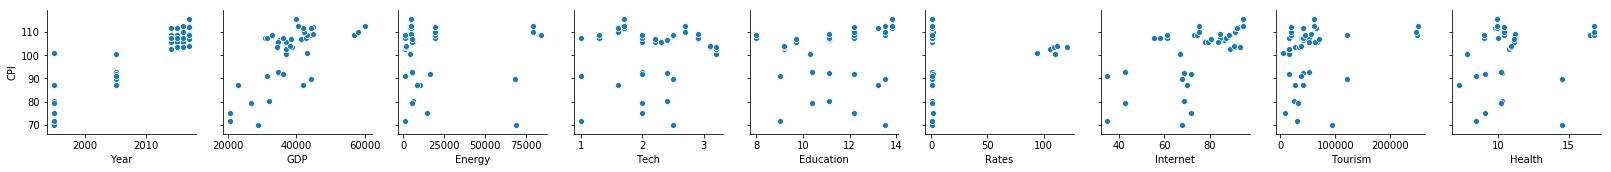

In [38]:
sns.pairplot(data = df1, y_vars = ['CPI'], x_vars = ['Year', 'GDP', 'Energy', 'Tech', 'Education', 'Rates', 'Internet', 'Tourism', 'Health'])
plt.show()

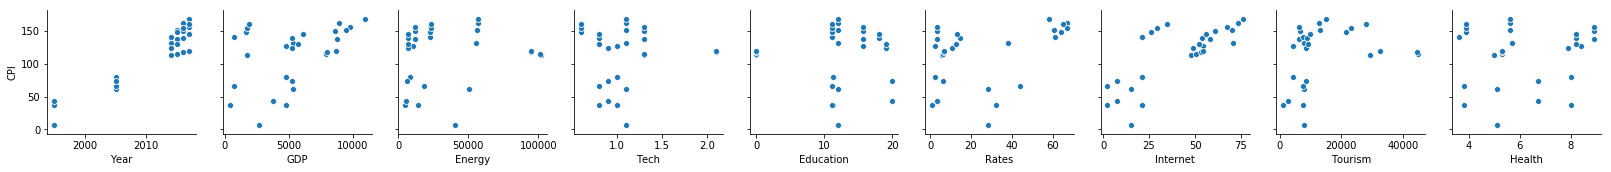

In [39]:
sns.pairplot(data = df2, y_vars = ['CPI'], x_vars = ['Year', 'GDP', 'Energy', 'Tech', 'Education', 'Rates', 'Internet', 'Tourism', 'Health'])
plt.show()

## 5. Data Modeling:

### Predictor variables:
- Year: categorical 
    - 6 levels: 1995, 2005, 2014, 2015, 2016, 2017
- Country_code: 
    - 7 levels for G7 (1 to 7)
    - 5 levels for BRICS (8 to 12)
- GDP: numeric
- Energy: numeric
- Tech: numeric
- Education: numeric
- Rates: numeric
- Internet: numeric
- Tourism: numeric
- Health: numeric
- Group (used in multiple linear regression only): categorical
    - 1 if the country is one of G7
    - 2 if the country is one of BRICS

### Response variable:

In part I: CPI_level 
- categorical variable with 4 categories (1, 2, 3, and 4)
  - CPI > 150: high CPI (class 4)
  - 120 < CPI <= 150: medium CPI (class 3)
  - 80 <= CPI <= 120: moderate CPI (class 2)
  - CPI <= 80: low CPI (class 1)
  
In part II: CPI
- numeric value of CPI

### Structure:
#### Part I: predcition on CPI_level (categorical):
  
(1) G7 countries modeling:
  - KNN classifier
  - Naive Bayes classifier
  
(2) BRICS countires modeling:
  - KNN classifier
  - Naive Bayes classifier
  
(3) G7 and BRICS combined:
  - KNN classifier
  - Naive Bayes classifier

#### Part II: prediction on CPI (numeric):

Multiple regression models on:
- G7 countries
- BRICS countries
- G7 and BRICS combined


In [40]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, preprocessing, model_selection

In [41]:
# handling warning messages:
import warnings
warnings.filterwarnings('ignore')

## Part I: predicting CPI as categorical variables:


### Transform categorical variable using OneHotEncoder:

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
encode = OneHotEncoder(sparse = False)

In [44]:
df1 = pd.concat([df1, pd.DataFrame(encode.fit_transform(df1[["Country_code"]]), columns = G7)], axis = 1)
df2 = pd.concat([df2, pd.DataFrame(encode.fit_transform(df2[["Country_code"]]), columns = BRICS)], axis = 1)
print(df1.columns)
print(df2.columns)

Index(['Year', 'CPI', 'GDP', 'Energy', 'Tech', 'Education', 'Rates',
       'Internet', 'Tourism', 'Health', 'Country', 'Country_code', 'CPI_Level',
       'United States of America', 'Germany', 'France', 'Japan', 'Canada',
       'United Kingdom', 'Italy'],
      dtype='object')
Index(['Year', 'CPI', 'GDP', 'Energy', 'Tech', 'Education', 'Rates',
       'Internet', 'Tourism', 'Health', 'Country', 'Country_code', 'CPI_Level',
       'Brazil', 'Russian Federation', 'India', 'China', 'South Africa'],
      dtype='object')


### Cross Validation sets:

In [45]:
x1 = df1.iloc[:, [0,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19]].astype(float)
y1 = df1.iloc[:, 12]
x2 = df2.iloc[:, [0,2,3,4,5,6,7,8,9,13,14,15,16,17]].astype(float)
y2 = df2.iloc[:, 12]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 1, stratify = df1.Country_code)
print("training and testing sets for G7 countries:")
print((x1_train).shape)
print((x1_test).shape)
print(x1.shape)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 1, stratify = df2.Country_code)
print("training and testing sets for BRICS countries:")
print((x2_train).shape)
print((x2_test).shape)
print(x2.shape)

training and testing sets for G7 countries:
(33, 16)
(9, 16)
(42, 16)
training and testing sets for BRICS countries:
(22, 14)
(6, 14)
(28, 14)


### (1) G7 countries

### (a) KNN classifier:

In [46]:
knn = KNeighborsClassifier()
knn.fit(x1_train, y1_train)
prediction = knn.predict(x1_test)
print("predicted: ", prediction)
print("actual: ", y1_test.values)
confusion_matrix(y1_test, prediction)

predicted:  [2 2 2 2 2 2 2 2 2]
actual:  [1 1 2 2 2 2 2 2 2]


array([[0, 2],
       [0, 7]])

### Paramter search using GridSearchCV:

In [47]:
grids = {'n_neighbors': np.arange(1, 10), 'weights': ['uniform','distance']}
knn_grid = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_grid, grids, cv = 5)
knn_grid.fit(x1_train, y1_train)

n = knn_grid.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors = n)
print(n)
print(knn_grid.best_score_ )

knn.fit(x1_train, y1_train)
prediction = knn.predict(x1_test)
print("predicted: ", prediction)
print("actual: ", y1_test.values)
confusion_matrix(y1_test, prediction)

3
0.9393939393939394
predicted:  [2 2 2 2 2 2 2 2 2]
actual:  [1 1 2 2 2 2 2 2 2]


array([[0, 2],
       [0, 7]])

### (b) Naive Bayes Classifier:

In [48]:
naiveBayes = GaussianNB()
naiveBayes.fit(x1_train, y1_train)
print("predicted: ", naiveBayes.predict(x1_test))
print("actual: ", y1_test.values)
confusion_matrix(y1_test, naiveBayes.predict(x1_test))

predicted:  [2 2 2 2 2 2 2 2 2]
actual:  [1 1 2 2 2 2 2 2 2]


array([[0, 2],
       [0, 7]])

### (2) BRICS countires

### (a) KNN classifier:

In [49]:
knn = KNeighborsClassifier()
knn.fit(x2_train, y2_train)
prediction = knn.predict(x2_test)
print("predicted: ", prediction)
print("actual: ", y2_test.values)
confusion_matrix(y2_test, prediction)

predicted:  [3 2 3 3 3 1]
actual:  [3 2 4 1 1 1]


array([[1, 0, 2, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

### Paramter search using GridSearchCV:

In [50]:
grids = {'n_neighbors': np.arange(1, 10), 'weights': ['uniform','distance']}
knn_grid = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_grid, grids, cv = 5)
knn_grid.fit(x2_train, y2_train)
print(n)
print(knn_grid.best_score_ )

n = knn_grid.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(x2_train, y2_train)
prediction = knn.predict(x2_test)
print("predicted: ", prediction)
print("actual: ", y2_test.values)
confusion_matrix(y2_test, prediction)

3
0.6363636363636364
predicted:  [3 2 4 4 3 1]
actual:  [3 2 4 1 1 1]


array([[1, 0, 1, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

### (b) Naive Bayes Classifier:

In [51]:
naiveBayes = GaussianNB()
naiveBayes.fit(x2_train, y2_train)
print("predicted: ", naiveBayes.predict(x2_test))
print("actual: ", y2_test.values)
confusion_matrix(y2_test, naiveBayes.predict(x2_test))

predicted:  [3 2 4 1 1 1]
actual:  [3 2 4 1 1 1]


array([[3, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

### (3) G7 and BRICS combined:

### Cross Validation sets:

In [52]:
x1 = df1.iloc[:, [0,2,3,4,5,6,7,8,9,11]].astype(float)
y1 = df1.iloc[:, 12]
x2 = df2.iloc[:, [0,2,3,4,5,6,7,8,9,11]].astype(float)
y2 = df2.iloc[:, 12]

x = pd.concat([x1, x2])
y = pd.concat([y1, y2])

x.reset_index(inplace = True)
x = pd.concat([x, pd.DataFrame(encode.fit_transform(x[["Country_code"]]), columns = G7 + BRICS)], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = x.Country_code)
print("training and testing sets for two datasets combined:")
print((x_train).shape)
print((x_test).shape)
print(x.shape)

training and testing sets for two datasets combined:
(56, 23)
(14, 23)
(70, 23)


### (a) KNN classifier:

In [53]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("predicted: ", prediction)
print("actual: ", y_test.values)
confusion_matrix(y_test, prediction)

predicted:  [1 2 1 2 2 2 2 2 1 1 3 2 2 2]
actual:  [4 2 4 2 2 2 2 2 1 4 3 2 2 1]


array([[1, 1, 0, 0],
       [0, 8, 0, 0],
       [0, 0, 1, 0],
       [3, 0, 0, 0]])

### Paramter search using GridSearchCV:

In [54]:
grids = {'n_neighbors': np.arange(1, 10), 'weights': ['uniform','distance']}
knn_grid = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_grid, grids, cv = 5)
knn_grid.fit(x_train, y_train)

n = knn_grid.best_params_['n_neighbors']
print(n)
print(knn_grid.best_score_ )

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("predicted: ", prediction)
print("actual: ", y_test.values)
confusion_matrix(y_test, prediction)

1
0.7142857142857143
predicted:  [4 2 4 2 2 1 2 2 3 4 3 2 2 1]
actual:  [4 2 4 2 2 2 2 2 1 4 3 2 2 1]


array([[1, 0, 1, 0],
       [1, 7, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 3]])

### (b) Naive Bayes Classifier:

In [55]:
naiveBayes = GaussianNB()
naiveBayes.fit(x_train, y_train)
print("predicted: ", naiveBayes.predict(x_test))
print("actual: ", y_test.values)
(confusion_matrix(y_test, naiveBayes.predict(x_test)))

predicted:  [4 2 4 2 2 1 2 2 1 4 3 2 2 1]
actual:  [4 2 4 2 2 2 2 2 1 4 3 2 2 1]


array([[2, 0, 0, 0],
       [1, 7, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 3]])

### Part II: predicting CPI as a numeric variable
### Cross Validation sets:

In [56]:
# treat country_code as categorical variable:
x1 = df1.iloc[:, [0,2,3,4,5,6,7,8,9,11]]
y1 = df1.iloc[:, 1]
x2 = df2.iloc[:, [0,2,3,4,5,6,7,8,9,11]]
y2 = df2.iloc[:, 1]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 1, stratify = x1.Country_code)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 1, stratify = x2.Country_code)

x1["Group"] = 1
x2["Group"] = 2
x = pd.concat([x1, x2])
y = pd.concat([y1, y2])

x.reset_index(inplace = True)
x.drop("index", axis = 1, inplace = True)
x = pd.concat([x, pd.DataFrame(encode.fit_transform(x[["Group"]]), columns = ["G7", "BRICS"])], axis = 1)
x_origin = x.copy()
x = pd.concat([x, pd.DataFrame(encode.fit_transform(x[["Country_code"]]), columns = G7 + BRICS)], axis = 1)

# for MLR modeling:
df = pd.concat([x, y.reset_index().iloc[:, 1]], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = x.Country_code)
print("training and testing sets for two datasets combined:")
print((x_train).shape)
print((x_test).shape)
print(x.shape)

# for future predictions (with country_code):
x_train_code, x_test_code, y_train_code, y_test_code = train_test_split(x_origin, y, test_size = 0.2, random_state = 1, stratify = x.Country_code)
print("training and testing sets for two datasets combined (without tranforming country_code):")
print((x_train_code).shape)
print((x_test_code).shape)
print(x_origin.shape)

training and testing sets for two datasets combined:
(56, 25)
(14, 25)
(70, 25)
training and testing sets for two datasets combined (without tranforming country_code):
(56, 13)
(14, 13)
(70, 13)


### Multiple linear regression model for G7:

In [57]:
linear1 = linear_model.LinearRegression()
linear1.fit(x1_train, y1_train)
linear1.score(x1_train, y1_train)

0.914612472950444

### Multiple linear regression model for BRICS:

In [58]:
linear2 = linear_model.LinearRegression()
linear2.fit(x2_train, y2_train)
linear2.score(x2_train, y2_train)

0.9785759999453596

### Multiple linear regression model for G7 and BRICS combined:

In [59]:
x_train = x_train.drop("Country_code", axis = 1)
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
linear.score(x_train, y_train)

0.9487124791210879

### Multiple linear regression with country code (as numeric):

In [60]:
## x_train = x_train.drop("Country_code", axis = 1) already not inside the dataframe
linear_s = linear_model.LinearRegression()
linear_s.fit(x_train_code, y_train_code)
linear_s.score(x_train_code, y_train_code)

0.7973430177717024

### Cross Validation on linear model:

In [61]:
cv = model_selection.ShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 0)
cv_linear = model_selection.cross_val_score(linear1, x1, y1, cv = cv)
print(cv_linear)
print(np.mean(cv_linear))

[0.74869989 0.621936   0.46861086]
0.6130822507682123


In [62]:
cv = model_selection.ShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 0)
cv_linear = model_selection.cross_val_score(linear2, x2, y2, cv = cv)
print(cv_linear)
print(np.mean(cv_linear))

[0.88344879 0.91287006 0.26441176]
0.6869102021628186


In [63]:
cv = model_selection.ShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 0)
cv_linear = model_selection.cross_val_score(linear, x, y, cv = cv)
print(cv_linear)
print(np.mean(cv_linear))

[0.8791495  0.68893718 0.89421908]
0.8207685836206813


### Test Statistics from ANOVA:
Note: with the issue of overfitting

In [64]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [65]:
model = smf.ols("CPI ~ Year + GDP  + Energy + Tech + Education + Rates + Internet + Tourism + Health + C(Country_code)", data = df1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     27.23
Date:                Wed, 29 May 2019   Prob (F-statistic):           4.04e-12
Time:                        09:31:00   Log-Likelihood:                -104.32
No. Observations:                  42   AIC:                             240.6
Df Residuals:                      26   BIC:                             268.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2515.7326 

In [66]:
# without using country_code:
model = smf.ols("CPI ~ Year + GDP  + Energy + Tech + Education + Rates + Internet + Tourism + Health", data = df1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     28.00
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.01e-12
Time:                        09:31:00   Log-Likelihood:                -117.61
No. Observations:                  42   AIC:                             255.2
Df Residuals:                      32   BIC:                             272.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2200.5113    500.530     -4.396      0.0

In [67]:
model = smf.ols("CPI ~ Year + GDP  + Energy + Tech + Education + Internet + Tourism + Health + C(Country_code)", data = df2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     154.3
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.91e-13
Time:                        09:31:00   Log-Likelihood:                -78.305
No. Observations:                  28   AIC:                             182.6
Df Residuals:                      15   BIC:                             199.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6586.60

In [68]:
# without using country_code:
model = smf.ols("CPI ~ Year + GDP  + Energy + Tech + Education + Internet + Tourism + Health", data = df2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     81.10
Date:                Wed, 29 May 2019   Prob (F-statistic):           4.79e-13
Time:                        09:31:00   Log-Likelihood:                -96.001
No. Observations:                  28   AIC:                             210.0
Df Residuals:                      19   BIC:                             222.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8791.0353   1021.222     -8.608      0.0

In [69]:
model = smf.ols("CPI ~ Year + GDP  + Energy + Tech + Education + Internet + Tourism + Health + C(Group) + C(Country_code)", data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     25.28
Date:                Wed, 29 May 2019   Prob (F-statistic):           2.79e-19
Time:                        09:31:00   Log-Likelihood:                -255.10
No. Observations:                  70   AIC:                             550.2
Df Residuals:                      50   BIC:                             595.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3127.38

In [70]:
simplified = smf.ols("CPI ~ Year + GDP + C(Group) + C(Country_code) + Tech + Education", data = df)
results = simplified.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     8.356
Date:                Wed, 29 May 2019   Prob (F-statistic):           2.25e-09
Time:                        09:31:00   Log-Likelihood:                -295.75
No. Observations:                  70   AIC:                             623.5
Df Residuals:                      54   BIC:                             659.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6951.76

### Testing on G20 countries (not in G7 nor in BRICS):

In [71]:
# testing on G20 countries (not in G7 nor in BRICS) (Note: no data entry for South Korea, and only one entry for Argentina)
# added test countries: New Zealand and Singapore
testing = ["Australia", 'Saudi Arabia', 'India', 'Turkey', 'Mexico', 'Indonesia', 'New Zealand', 'Singapore']  # Argentina
CPI.loc[years, testing]

Country,Australia,Saudi Arabia,India,Turkey,Mexico,Indonesia,New Zealand,Singapore
Year,,,,,,,,
1995,67.6,NaN,37.6,1.3,26.4,19.4,71.7,81.5
2005,86.3,81.4,65.8,65.9,80.5,68.7,87.0,88.0
2014,110.4,112.9,140.8,135.7,116.2,124.4,107.6,113.8
2015,112.0,114.4,147.7,146.1,119.4,132.3,107.9,113.2
2016,113.5,116.7,155.0,157.4,122.8,137.0,108.6,112.6
2017,115.7,115.7,160.1,175.0,130.2,142.2,110.7,113.3


In [72]:
df_test = pd.DataFrame()
for name in testing: 
    table = pd.DataFrame(CPI.stack().loc[list(years), name])
    table = pd.concat([table, pd.DataFrame(GDP.stack().loc[list(years), name]), pd.DataFrame(energy.stack().loc[list(years), name]), pd.DataFrame(tech.stack().loc[list(years), name]), pd.DataFrame(education.stack().loc[list(years), name]), pd.DataFrame(rates.stack().loc[list(years), name]), pd.DataFrame(internet.stack().loc[list(years), name]), pd.DataFrame(tourism.stack().loc[list(years), name]), pd.DataFrame(health.stack().loc[list(years), name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"], axis = 1)
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df_test = pd.concat([df_test, table])
    
df_test.fillna(0, inplace = True)

df_test.columns = df_test.columns.droplevel(1)
df_test["Country"] = df_test.index.get_level_values(1)
df_test.index = df_test.index.droplevel(1)
df_test.reset_index(inplace = True)

In [73]:
code_test = {"Australia" : 13, "Saudi Arabia" : 14, "India" : 15, "Turkey" : 16, "Mexico" : 17, "Indonesia" : 18, 'New Zealand' : 19, 'Singapore' : 20}
group_code = {"Australia" : 1, "Saudi Arabia" : 1, "India" : 2, "Turkey" : 2, "Mexico" : 2, "Indonesia" : 2, 'New Zealand' : 1, 'Singapore' : 1}

df_test["Country_code"] = [code_test[country] for country in df_test.Country]
df_test["Group"] = [group_code[country] for country in df_test.Country]

In [74]:
x_test = df_test.iloc[:, [0,2,3,4,5,6,7,8,9,11,12]]
y_test = df_test.iloc[:, 1]

x_test.reset_index(inplace = True)
x = pd.concat([x_test, pd.DataFrame(encode.fit_transform(x_test[["Group"]]), columns = ["G7", "BRICS"])], axis = 1)
x.drop("index", axis = 1, inplace = True)
# for MLR modeling:
df_testing = pd.concat([x, y_test.reset_index().iloc[:, 1]], axis = 1)
x.head()

,Year,GDP,Energy,Tech,Education,Rates,Internet,Tourism,Health,Country_code,Group,G7,BRICS
0,1995,21635.0,7784.0,1.9,13.6,1.3,63.0,10370.0,8.0,13,1,1.0,0.0
1,2005,37571.0,11451.0,1.9,13.6,1.3,63.0,19719.0,8.0,13,1,1.0,0.0
2,2014,37571.0,15272.0,1.9,13.9,1.1,84.0,19719.0,9.1,13,1,1.0,0.0
3,2015,52388.0,15930.0,1.9,13.9,1.3,84.6,30872.0,9.4,13,1,1.0,0.0
4,2016,54067.0,16322.0,1.9,13.9,1.3,86.5,36786.0,9.4,13,1,1.0,0.0


In [75]:
print(x_train_code.shape)
print(x.shape)

(56, 13)
(48, 13)


In [76]:
# MLR with country_code predictor (instead of categorical variable for country_code):
linear_s.score(x, y_test)

0.2678302591540115

In [77]:
# MLR without country_code predictor:
# x = x.drop("Country_code", axis = 1)
# x.head()

In [78]:
# MLR with country_code predictor:
# linear_s.score(x, y_test)

In [79]:
model = smf.ols("CPI ~ Year + GDP  + Energy + Tech + Education + Internet + Tourism + Health + C(Group) + C(Country_code)", data = df_testing)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     38.88
Date:                Wed, 29 May 2019   Prob (F-statistic):           2.84e-16
Time:                        09:31:01   Log-Likelihood:                -169.72
No. Observations:                  48   AIC:                             371.4
Df Residuals:                      32   BIC:                             401.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6069.98

## 6. Results and Analysis:

### Part I: predicting CPI range (categorical)
#### Results:
- G7 countries:
    - KNN: tends to predict higher CPI range.
    - Naive Bayes: tends to predict higher CPI range.
    - Summary: two classifiers have very similar classification outcomes.
- BRICS:
    - KNN: tends to predict higher CPI range.
    - Naive Bayes: correctly classified all labels in the testing set.
    - Summary: has higer correct classification rate than KNN.
- G7 and BRICS:
    - KNN: tends to have misclassifications on class 1 and class 3.
    - Naive Bayes: tends to have misclssifications on class 1.
    - Summary: Naive Bayes classifier classifies the label better than KNN classifier.
    
#### Analysis:
(1) Analysis on two types of classifiers:
- In KNN classifier, we are looking for the neareast neighbors based on Euclidean distances to decide which class the input belongs to. 
- In Naive Bayes classifier, we assumed that predictor variables are independent from each other. This is an important simpification in our model, since the macroeconomics predictors (such as GDP, expenditure on energy, expenditure on education, etc.) that we have choosen to use are, to some degree, independent factors that represent the economic growth of countries.
- Based on the fact that Naive Bayes classifier has a reasonable assumption that can largely simplify the analysis and increase the accuracy of the classification, we suggest using Naive Bayes classification method in this model.

(2) Analysis on three ways of making the classification:
- In the classification for G7 countries, it can be observed that there are only two possible labels for the range of CPI: 1 (low CPI) and 2 (moderate CPI). 
- In the classification for BRICS countries, there are four different labels for the range of CPI, varying from 1 to 4.
- The difference between the total number of output classes reflects the fact that these two groups of countries have quite different economic growth pattern, i.e., the developed countries in G7 tend to have more stable range of CPI, while the developing countries in BRICS tend to have more fluctuations in the range of CPI.
- This difference between CPI of G7 and BRICS can be observed from the output of three classifications: the correct classification rate is higher when we seperated countries into G7 and BRICS countries.
- Therefore, it is more reasonable to analyze the CPI range of G7 and BRICS countries seperately, based on the situation that developed countries and developing countries tend to have large amount of variation in their ecnomic growth pattern.

### Part II: predicting CPI value (numeric)
#### Results:
- MLR model for G7 countries:
    - $R^{2}_{adj}$: 0.906
    - CV score: 0.6131
- BRICS:
    - $R^{2}_{adj}$: 0.986
    - CV score: 0.6869
- G7 and BRICS:
    - $R^{2}_{adj}$:
    - CV score: 0.8208
- New testing set of countries:
    - $R^{2}$: 0.2678
    - $R^{2}_{adj}$ of new model: 0.924
    
#### Analysis:

## 7. Conclusion:

## 8. References:

- Description of CPI data: http://data.un.org/_Docs/SYB/PDFs/SYB61_T19_Consumer%20Price%20Index.pdf
- G7 countries: https://en.wikipedia.org/wiki/Group_of_Seven
- BRICS countries: https://en.wikipedia.org/wiki/BRICS
- G20 countries: https://en.wikipedia.org/wiki/G20

- Factors related to CPI: https://www.investopedia.com/terms/c/consumerpriceindex.asp